真实值: [[4]], [4]
预测值：[[3.8645734 ]
 [4.09252723]]


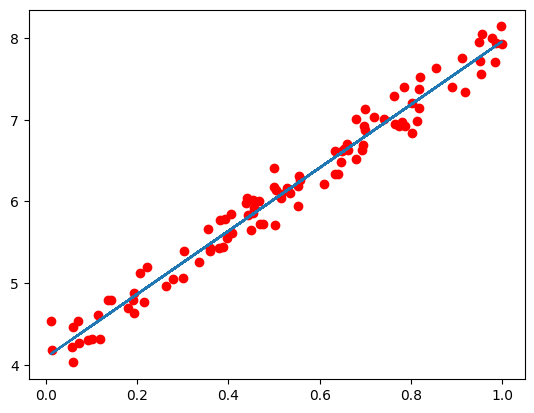

In [19]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

# 真实数据
X = np.random.rand(100, 1)  # 样本数据，只有一个特征
W = np.random.randint(1, 10, size=(1, 1))  # 样本特征，即W矩阵，1个
b = np.random.randint(1, 10, size=1)  # 截距
y = X.dot(W) + b + np.random.randn(100, 1) * 0.2  # 每个样本加个噪声，噪声缩小点，都乘以0.3

# 初始化
X = np.concatenate((X, np.full((100, 1), 1)), axis=1)  # 为样本增加 W0 列
theta = np.random.randn(2, 1)  # 盲猜模型参数W矩阵
epoches = 2000  # 下降次数、即迭代次数
learn_rate = 0.01  # 学习率

# 迭代
for epoch in range(epoches):
    g = X.T.dot(X.dot(theta) - y)  # 根据BGD 计算梯度
    theta = theta - learn_rate * g

axes = plt.subplot(111)
axes.scatter(X[:, 0], y, color='red')
axes.plot(X, X * theta[0, 0] + theta[1, 0])  # theta 就是W 就是f(x)
print(f'真实值: {W.T}, {b}')
print(f'预测值：{theta}')

In [15]:
%reset -f

# 多特征案例 + 动态学习率
import numpy as np

# 真实数据
X = np.random.rand(100, 7)  # 100行行本，每行样本7个特征值
W = np.random.randint(1, 10, size=(7, 1))  # W 矩阵，7列
b = np.random.randint(1, 10, size=1)  # b 截距，1列

y = X.dot(W) + b + np.random.randn(100, 1)
print(f'真实数据: X={W.T}')
print(f'真实数据: b={b}')

# 数据初始化
theta = np.random.randn(8, 1)  # w系数矩阵，7个特征+1个截距=8个w
epoches = 2000
X = np.concatenate((X, np.ones((100, 1))), axis=1)  # 增加截距列系数W0，也就是1 


# 优化（1）：随着迭代次数/训练次数的增加，学习率慢慢变小
def learning_rate(t):
    # return 1 / (1000 + t)
    return 5 / (1000 + t)


for epoch in range(epoches):
    g = X.T.dot(X.dot(theta) - y)  # 根据BGD 计算梯度
    theta = theta - learning_rate(epoch) * g

print(f'梯度下降：{theta.T}')

真实数据: X=[[9 1 7 1 6 4 9]]
真实数据: b=[6]
梯度下降：[[8.92118956 1.32508432 6.80696977 1.0770022  6.26415239 3.98988842
  8.89666167 5.99018897]]


真实数据: X=[[7]]
真实数据: b=[[1]]
梯度下降：[[6.22001235 1.84986572]]


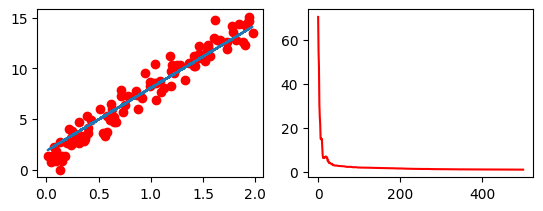

In [51]:
%reset -f 
# 随机梯度下降
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

axes1 = plt.subplot(221)
axes2 = plt.subplot(222)
# 随机数生成器对象，固定种子，确保每次生成的随机数相同
rs = np.random.RandomState(seed=42)

# 真实值
X = 2 * rs.rand(100, 1)  # 100 个样本，1个特征
W = rs.randint(1, 10, size=(1, 1))
b = rs.randint(1, 10, size=(1, 1))
y = X.dot(W) + b + rs.randn(100, 1)
axes1.scatter(X, y, color='red')
print(f'真实数据: X={W.T}')
print(f'真实数据: b={b}')

# 初始化
X = np.concatenate((X, np.full((100, 1), 1)), axis=1)  # 构建偏置项
theta = np.random.randn(2, 1)
epoches = 500
learning_rate = lambda t: 5 / (100 + t)

# 梯度下降
loss = []
for epoch in range(epoches):
    idx = np.random.randint(0, 100, size=1)
    Xi, yi = X[idx], y[idx]

    g = Xi.T.dot(Xi.dot(theta) - yi)
    theta = theta - learning_rate(epoch) * g

    y_pred = X.dot(theta)  # 根据当前预测的W，计算样本预测的目标值
    loss.append(mean_squared_error(y, y_pred))

axes1.plot(X[:, 0], X[:, 0].dot(theta[0, 0]) + theta[1, 0])
axes2.plot(loss, color='red')
print(f'梯度下降：{theta.T}')

真实数据: X=[[7]]
真实数据: b=[[1]]
梯度下降：[[6.41472951 1.61529742]]


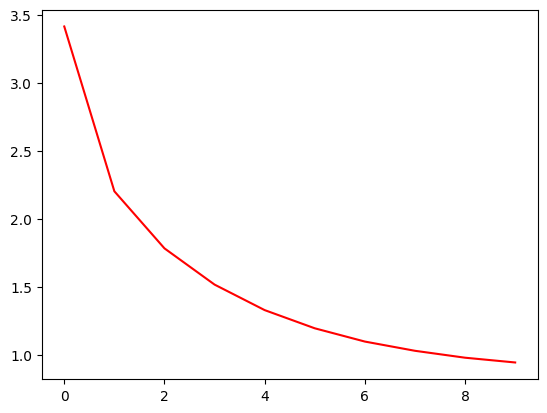

In [65]:
%reset -f 
# 随机梯度下降优化
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

axes = plt.subplot(111)
# 随机数生成器对象，固定种子，确保每次生成的随机数相同
rs = np.random.RandomState(seed=42)

# 真实值
X = 2 * rs.rand(100, 1)  # 100 个样本，1个特征
W = rs.randint(1, 10, size=(1, 1))
b = rs.randint(1, 10, size=(1, 1))
y = X.dot(W) + b + rs.randn(100, 1)
print(f'真实数据: X={W.T}')
print(f'真实数据: b={b}')

# 初始化
X = np.concatenate((X, np.full((100, 1), 1)), axis=1)  # 构建偏置项
theta = np.random.randn(2, 1)
epoches = 10
learning_rate = lambda t: 1 / (100 + t)

# 梯度下降
loss = []
for epoch in range(epoches):
    idxs = np.arange(100)  # 生成100个索引
    np.random.shuffle(idxs)  # 打乱这些索引

    # 对原始样本根据乱序的idx 重新排列、洗牌
    X = X[idxs]
    y = y[idxs]

    # 洗牌10次，每次洗牌挨个拿取一个样本，来对参数更新
    # 遍历重新洗牌后的 X、y；相当于随机选择Xi、yi
    for sample_x, sample_y in zip(X, y):
        # 遍历zip() 中的数据，会被降维 (2,1) 变成 (2,)
        Xi = sample_x.reshape(-1, 2)
        yi = sample_y.reshape(-1, 1)

        g = Xi.T.dot(Xi.dot(theta) - yi)
        theta = theta - learning_rate(epoch) * g

    # 遍历完所有的样本后，将最终的theta 当做本次迭代后最终生成的theta
    y_pred = X.dot(theta)  # 根据当前预测的W，计算样本预测的目标值
    loss.append(mean_squared_error(y, y_pred))

axes.plot(loss, color='red')
print(f'梯度下降：{theta.T}')

真实数据: X=[[3 1 6 2 8 5 7]]
真实数据: b=[[2]]
梯度下降：[[3.21725379 0.56421736 5.87149325 1.95907706 7.8444072  4.81722673
  6.96409453 2.87898843]]


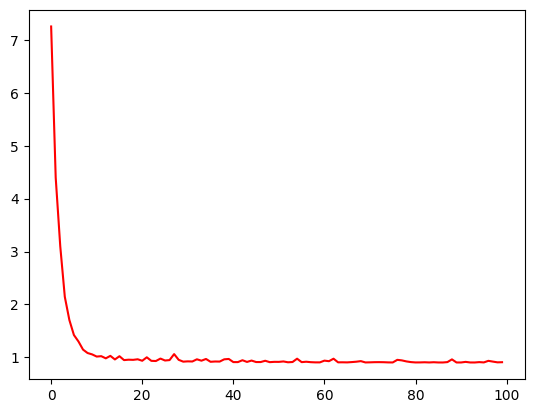

In [66]:
%reset -f 
# 随机梯度下降解决多元线性回归
# 随机梯度下降优化
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

axes = plt.subplot(111)
# 随机数生成器对象，固定种子，确保每次生成的随机数相同
rs = np.random.RandomState(seed=42)

# 真实值
X = 2 * rs.rand(100, 7)  # 100 个样本，7个特征
W = rs.randint(1, 10, size=(7, 1))
b = rs.randint(1, 10, size=(1, 1))
y = X.dot(W) + b + rs.randn(100, 1)
print(f'真实数据: X={W.T}')
print(f'真实数据: b={b}')

# 初始化
X = np.concatenate((X, np.full((100, 1), 1)), axis=1)  # 构建偏置项
theta = np.random.randn(8, 1)
epoches = 100
learning_rate = lambda t: 1 / (100 + t)

# 梯度下降
loss = []
for epoch in range(epoches):
    idxs = np.arange(100)  # 生成100个索引
    np.random.shuffle(idxs)  # 打乱这些索引

    # 对原始样本根据乱序的idx 重新排列、洗牌
    X = X[idxs]
    y = y[idxs]

    # 洗牌10次，每次洗牌挨个拿取一个样本，来对参数更新
    # 遍历重新洗牌后的 X、y；相当于随机选择Xi、yi
    for sample_x, sample_y in zip(X, y):
        # 遍历zip() 中的数据，会被降维 (2,1) 变成 (2,)
        Xi = sample_x.reshape(1, 8)
        yi = sample_y.reshape(1, 1)

        g = Xi.T.dot(Xi.dot(theta) - yi)
        theta = theta - learning_rate(epoch) * g

    # 遍历完所有的样本后，将最终的theta 当做本次迭代后最终生成的theta
    y_pred = X.dot(theta)  # 根据当前预测的W，计算样本预测的目标值
    loss.append(mean_squared_error(y, y_pred))

axes.plot(loss, color='red')
print(f'梯度下降：{theta.T}')

#### scikit-learn 模块

In [73]:
%reset -f

'''
sklearn 中只给了 SGDRegressor 这种随机梯度下降，也就是说这个模型是最优秀的

'''


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

rs = np.random.RandomState(seed=42)

# 真实值
X = 2 * rs.rand(100, 7)  # 100 个样本，7个特征
W = rs.randint(1, 10, size=(7, 1))
b = rs.randint(1, 10, size=(1, 1))
y = X.dot(W) + b + rs.randn(100, 1)
print(f'真实数据: X={W.T}')
print(f'真实数据: b={b}')

# 初始化
X = np.concatenate((X, np.full((100, 1), 1)), axis=1)  # 构建偏置项
theta = np.random.randn(8, 1)
epoches = 100
learning_rate = lambda t: 1 / (100 + t)

'''
invscaling 指数衰减，eta = eta0 / pow(t, power_t)
def __init__(
    self,
    loss="squared_error",  # 损失函数
    penalty="l2",  # 正则化方式
    alpha=0.0001,  # 正则化强度
    l1_ratio=0.15,  # L1与L2的混合比例
    fit_intercept=True,  # 是否计算截距
    max_iter=1000,  # 最大迭代次数
    tol=1e-3,  # 收敛容忍度
    shuffle=True,  # 是否在每次迭代时打乱数据
    verbose=0,  # 日志输出频率
    epsilon=DEFAULT_EPSILON,  # 损失容忍度
    random_state=None,  # 随机数种子
    learning_rate="invscaling",  # 学习率调整方式
    eta0=0.01,  # 初始学习率
    power_t=0.25,  # 学习率衰减的幂次
    early_stopping=False,  # 是否启用早期停止
    validation_fraction=0.1,  # 用于早期停止时用于验证的训练数据比例
    n_iter_no_change=5,  # 早期停止时的容忍迭代次数
    warm_start=False,  # 是否复用上次训练的结果
    average=False,  # 是否使用平均模型
):
'''

model = SGDRegressor(
    loss='squared_error',  # 平方误差
    fit_intercept=False,
    shuffle=True,  # 每次迭代，都会打乱顺序
    learning_rate='invscaling',  # 学习率，默认为指数缩放
    max_iter=2000,  # 最大迭代次数

)

# 不转也能执行，不过提示y 是二维的数据(100,1)，会自动转(100,)
model.fit(X, y.ravel())  # y.ravel() 平铺，即转为一维
model.score(X, y)
print(f'预测数据: {model.coef_}')

真实数据: X=[[3 1 6 2 8 5 7]]
真实数据: b=[[2]]
预测数据: [3.16596147 0.46745797 5.70887993 1.95989799 7.65429938 4.86131309
 6.80151012 3.46462823]


#### 小批量梯度下降

真实数据: X=[[2]]
真实数据: b=[5]
预测数据: [[2.13581392 4.95620705]]


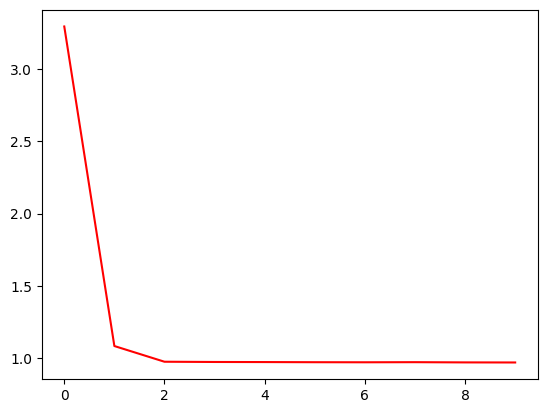

In [13]:
%reset -f 
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 真实数据
X = np.random.rand(100, 1)
W = np.random.randint(1, 10, size=(1, 1))
b = np.random.randint(1, 10, size=1)
y = X.dot(W) + b + np.random.randn(100, 1)
print(f'真实数据: X={W.T}')
print(f'真实数据: b={b}')


# 偏置项
X = np.concatenate((X, np.full((100, 1), 1)), axis=1)
rate = lambda t: 1 / (100 + t)
epochs = 10
batch_size = 16  # 每次选16个样本
batch_num = int(100 / batch_size)  # 每次16个，取num 次可以全部取出来，结果取整

# 瞎猜
theta = np.random.randn(2, 1)
loss = []

# 梯度下降
for i in range(epochs):
    # 每次迭代打乱下顺序
    idxs = np.arange(100)
    np.random.shuffle(idxs)

    # 乱序后的数据
    X = X[idxs]
    y = y[idxs]

    # 选取一小部分
    for b in range(batch_num):
        X_batch = X[batch_size * b: batch_size * (b + 1)]  # 切出来16个样本
        y_bacth = y[batch_size * b: batch_size * (b + 1)]
        
        g = X_batch.T.dot(X_batch.dot(theta) - y_bacth)
        theta = theta - g * rate(i)
        
    y_pred = X.dot(theta)
    loss.append(mean_squared_error(y, y_pred))
print(f'预测数据: {theta.T}')

plt.plot(loss, color='red')

真实数据: X=[[3 7 5 8 1]]
真实数据: b=[9]
预测数据: [[2.928 7.306 4.676 8.058 0.789 9.215]]


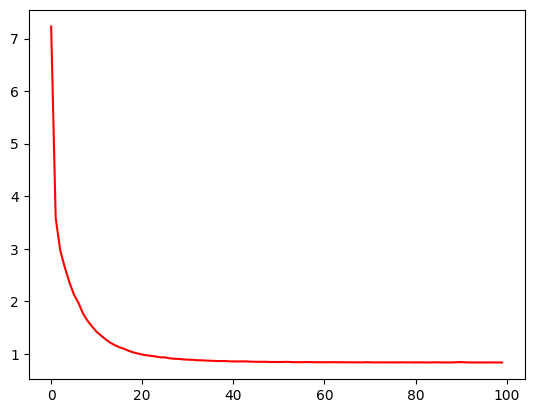

In [23]:
%reset -f 
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 真实数据
X = np.random.rand(100, 5)
W = np.random.randint(1, 10, size=(5, 1))
b = np.random.randint(1, 10, size=1)
y = X.dot(W) + b + np.random.randn(100, 1)
print(f'真实数据: X={W.T}')
print(f'真实数据: b={b}')


# 偏置项
X = np.concatenate((X, np.full((100, 1), 1)), axis=1)
rate = lambda t: 1 / (100 + t)
epochs = 100
batch_size = 16  # 每次选16个样本
batch_num = int(100 / batch_size)  # 每次16个，取num 次可以全部取出来，结果取整
# 
# 瞎猜
theta = np.random.randn(6, 1)
loss = []
# 
# 梯度下降
for i in range(epochs):
    # 每次迭代打乱下顺序
    idxs = np.arange(100)
    np.random.shuffle(idxs)

    # 乱序后的数据
    X = X[idxs]
    y = y[idxs]

    # 选取一小部分
    for item in range(batch_num):
        X_batch = X[batch_size * item: batch_size * (item + 1)]  # 切出来16个样本
        y_bacth = y[batch_size * item: batch_size * (item + 1)]

        g = X_batch.T.dot(X_batch.dot(theta) - y_bacth)
        theta = theta - g * rate(i)

    y_pred = X.dot(theta)
    loss.append(mean_squared_error(y, y_pred))
print(f'预测数据: {theta.T.round(3)}')

plt.plot(loss, color='red')

In [24]:
# 需要补充数据集的split、以及各种方法的损失函数图